In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
DATA_FOLDER = 'data/'
bm = pd.read_csv(f'{DATA_FOLDER}BS_block_model.csv')

In [3]:
bm.rename(columns = {
    'X': 'x', 
    'Y': 'y',
    'Z': 'z'
}, inplace = True)

In [4]:
idx = bm['x'].idxmin()
x_datum = bm['x'][idx]
y_datum = bm['y'][idx]
z_datum = bm['z'][idx]

x_dim, y_dim, z_dim = 10, 10, 10
z_rot = -26.4626

# bm_ijk = bm.ijk(
#     indexing=0,
#     xyz_cols=('x', 'y', 'z'),
#     origin=(x_datum, y_datum, z_datum),
#     dims=(x_dim, y_dim, z_dim),
#     inplace=False,
#     rotation=(0, 0, z_rot)
# )

In [5]:
bm_flat = {}
for idx, row in bm.iterrows():
    x, y, z = row.x, row.y, row.z
    if (x, y) in bm_flat:
        bm_flat[(x, y)] = min(bm_flat[(x, y)], z)
    else:
        bm_flat[(x, y)] = z

/var/folders/4h/m6_qv78d1ll6g0_5dn81rvh80000gp/T/ipykernel_70445/884554990.py:29: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



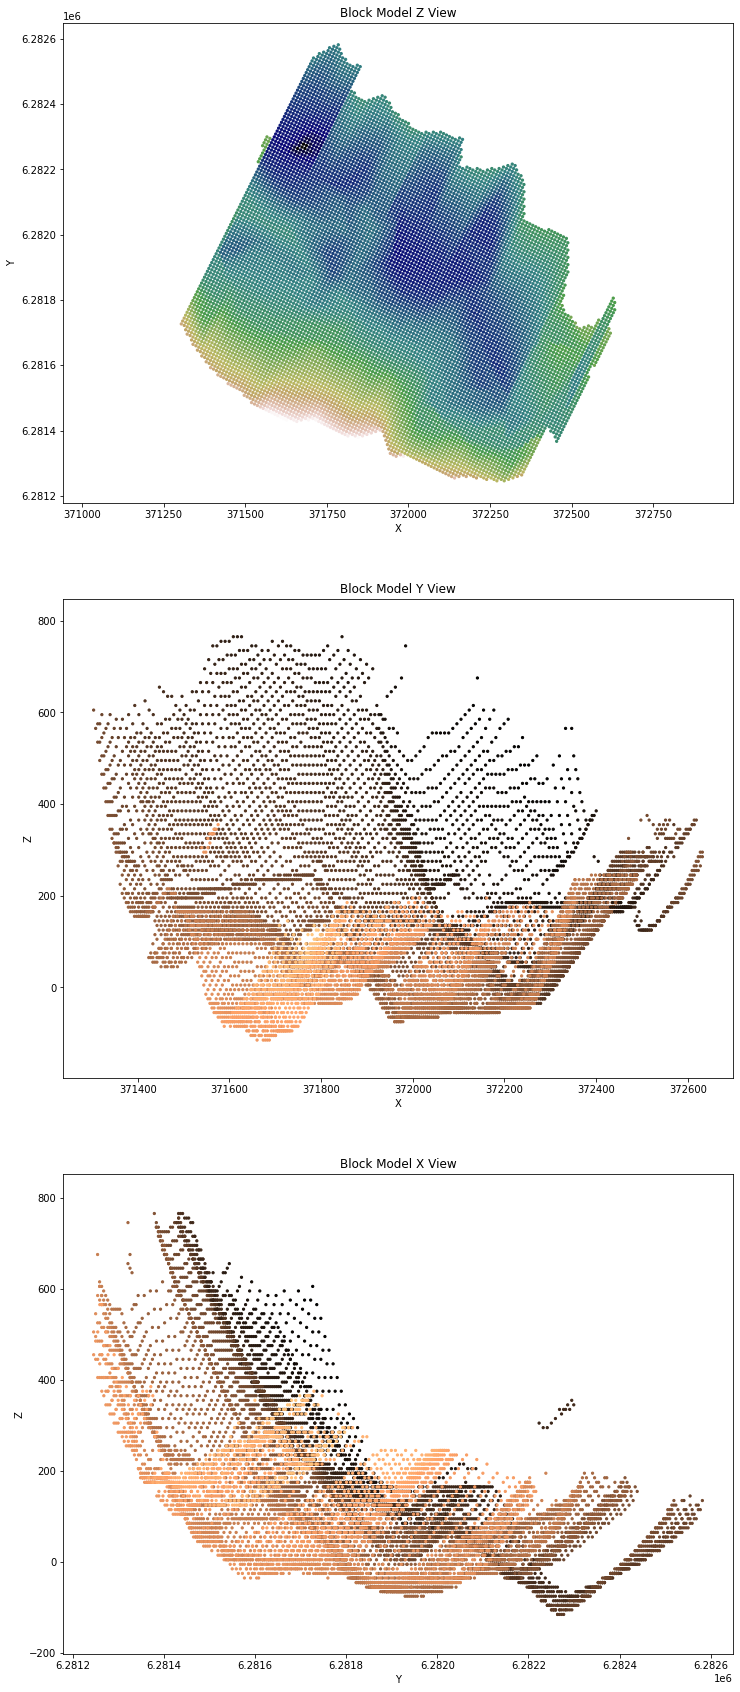

In [23]:
keys = np.array(list(bm_flat.keys()), dtype=np.dtype('float, float'))
x, y = keys['f0'], keys['f1']
z = np.array(list(bm_flat.values()))

fig, axs = plt.subplots(3, figsize=(12, 30))
s = 5

ax = axs[0]
ax.axis('equal')
ax.scatter(x, y, c=z, cmap='gist_earth', s=s)
ax.set_title("Block Model Z View")
ax.set_xlabel("X")
ax.set_ylabel("Y")

ax = axs[1]
ax.axis('equal')
ax.scatter(x, z, c=y, cmap='copper', s=s)
ax.set_title("Block Model Y View")
ax.set_xlabel("X")
ax.set_ylabel("Z")

ax = axs[2]
ax.axis('equal')
ax.scatter(y, z, c=x, cmap='copper', s=s)
ax.set_title("Block Model X View")
ax.set_xlabel("Y")
ax.set_ylabel("Z")

fig.show()

In [7]:
type(z)

numpy.ndarray

In [18]:
# Read data from a csv
# z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')
# z = z_data.values
# sh_0, sh_1 = z.shape
# x, y = np.linspace(0, 1, sh_0), np.linspace(0, 1, sh_1)

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(
    title='Block Model', autosize=False,
    width=500, height=500,
    margin=dict(l=65, r=50, b=65, t=90)
)

fig.show()


In [16]:
fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(
    title='Mt Bruno Elevation', autosize=False,
    width=500, height=500,
    margin=dict(l=65, r=50, b=65, t=90)
)
fig.show()